# Predicting the Sale Price of a House in Ames, Iowa

### Linear Regression Models and Evaluation

Libraries and functions to use:

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

Functions to evaluate and compare models

In [50]:
# Create a function to calculate the y-predictions and residuals for a given model

def check_residual(model, model_name, x_train_data, y_train_data, x_test_data, y_test_data):
    
    # Check residuals for baseline model
    if model== 'Baseline':
        y_prediction = np.exp(y_train_data.mean())
        y_predictions = []
        for i in range(0,len(y_test_data)):
            y_predictions.append(y_prediction)
        residuals = np.exp(y_test_data) - y_predictions
        
    # Calculate residuals and plot them 
    else:
        
        y_train_data = np.exp(y_train_data)
        y_test_data= np.exp(y_test_data)
        
        train_predictions = np.exp(model.predict(x_train_data))
        train_residuals = y_train_data - train_predictions
        
        test_predictions = np.exp(model.predict(x_test_data))
        test_residuals = y_test_data - test_predictions
        
        fig, axes = plt.subplots(1,2, figsize=(12,5))
        fig.suptitle(model_name + ' Model', fontsize=16)
        ax1 = axes[0]
        ax2 = axes[1]
        
        ax1.set_title('Residuals Scatterplot')
        ax1.set_xlabel("Predicted House Sale Price $")
        ax1.set_ylabel("Residuals")
        ax1.scatter(train_predictions, train_residuals, c = 'green', marker = '.', label = 'Training Data')
        ax1.scatter(test_predictions, test_residuals, c = 'blue', marker = '.', label = 'Testing Data')
        ax1.legend()
        ax1.hlines(y=0, xmin=50_000, xmax=500_000, color = 'red')
        
        ax2.set_title("Linear regression")
        ax2.set_xlabel("Predicted House Sale Price $")
        ax2.set_ylabel("Real House Sale Price $")
        ax2.scatter(train_predictions, y_train_data, c = 'green', marker = '.', label = "Training data")
        ax2.scatter(test_predictions, y_test_data, c = 'blue', marker = '.', label = "Testing data")
        ax2.legend()
        ax2.plot([100_000, 500_000], [100_000, 500_000], c = "red")
        
        plt.show()
    
    return 

In [51]:
# Create a function to calculate R2, MSE, RMSE

def evaluate_model(model, X, y):
    
    # Evalute baseline model
    if model == 'baseline':
        # Convert y_baseline to an array to calculate baseline metrics
        y_baseline = []
        for i in range(0,len(y)):
            y_baseline.append(X)
            
        print(f'Baseline: Avg Price = {X}')
        print(f'R2 Score: {r2_score(np.exp(y), y_baseline)}')
        print(f'MSE: {mean_squared_error(np.exp(y), y_baseline)}')
        print(f'RMSE: {np.sqrt(mean_squared_error(np.exp(y), y_baseline))}')
        
    else:
    # Evaluate other models
        print(f'R2 Score: {r2_score(np.exp(y), np.exp(model.predict(X)))}')
        print(f'MSE: {mean_squared_error(np.exp(y), np.exp(model.predict(X)))}')
        print(f'RMSE: {np.sqrt(mean_squared_error(np.exp(y), np.exp(model.predict(X))))}')

Load Ames Housing dataset

In [52]:
path = '../datasets/'
file_name = 'new_features_cleaned_dataset'
infile = open(path + file_name, 'rb')
df = pickle.load(infile)
infile.close()
df.head(5)

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Full Bath,Half Bath,...,Misc Feature_none,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,SalePrice_log
0,0.0,13517,6,8,1976,2005,725.0,1479,2,1,...,1,0,0,0,0,0,0,0,1,11.779129
1,43.0,11492,7,5,1996,1997,913.0,2122,2,1,...,1,0,0,0,0,0,0,0,1,12.301383
2,68.0,7922,5,7,1953,2007,1057.0,1057,1,0,...,1,0,0,0,0,0,0,0,1,11.599103
3,73.0,9802,5,5,2006,2007,384.0,1444,2,1,...,1,0,0,0,0,0,0,0,1,12.066811
4,82.0,14235,6,8,1900,1993,676.0,1445,2,0,...,1,0,0,0,0,0,0,0,1,11.838626


Split dataset into train and test sets to evaluate for model accuracy and check for bias and variance.

In [53]:
# Create feature matrix (X) and target vector (y)
X = df.drop(columns = ['SalePrice_log', 'SalePrice'])
y = df['SalePrice_log']

In [54]:
# Perform a split of x and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Baseline model and residuals
The baseline for this regression model is simply the mean of the target feature, Sale Price.

In [55]:
avg_sale_price = (np.exp(y_train)).mean()

Evaluate Baseline Model - Check Residuals

In [56]:
evaluate_model('baseline', avg_sale_price, y_test)

Baseline: Avg Price = 181756.7279843444
R2 Score: -0.0006702063442869388
MSE: 6483655812.060305
RMSE: 80521.15133342484


### OLS Linear Regression Model - No Regularization 

In [57]:
#Instantiate model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

OLS - Check how well does the OLS Linear Regression model fit the data

In [58]:
print('OLS - R^2 on training set:', lr.score(X_train, y_train))
print('OLS - R^2 on testing set:', lr.score(X_test, y_test))
print('OLS - Cross validation R^2 score is:', cross_val_score(lr, X_train, y_train).mean())

OLS - R^2 on training set: 0.9343084689587994
OLS - R^2 on testing set: 0.9099152110018407
OLS - Cross validation R^2 score is: 0.8617890112087558


The R-squared score is a bit higher on the training set than on the testing set, meaning this model is slightly overfit 

OLS - Check Residuals

In [59]:
evaluate_model(lr, X_test, y_test)

R2 Score: 0.9123067830752946
MSE: 568191829.8230121
RMSE: 23836.77473617209


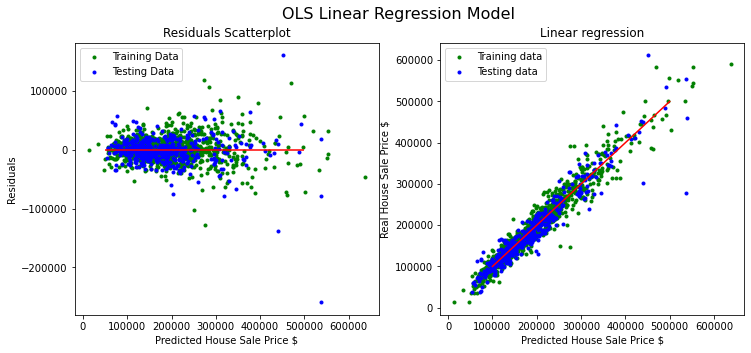

In [60]:
check_residual(lr, 'OLS Linear Regression', X_train, y_train, X_test, y_test)

OLS - Coefficients

Number of coefficients in the OLS Linear Regression model: 202


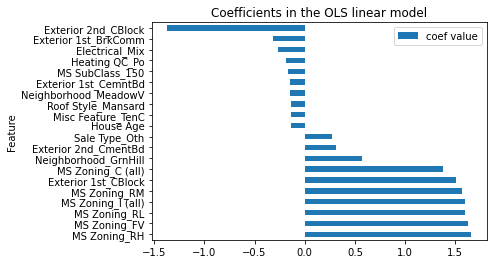

In [61]:
linear_coefficients = pd.DataFrame({
                                    'Feature' : X.columns,
                                    'coef value': lr.coef_    
                                    }).set_index('Feature').sort_values('coef value', ascending=False)

linear_coeffs_nonzero = linear_coefficients[linear_coefficients['coef value']!=0].shape[0]

print(f'Number of coefficients in the OLS Linear Regression model: {linear_coeffs_nonzero}')

linear_coefficients_summary = pd.concat([linear_coefficients.head(10),
                     linear_coefficients.tail(10)])
linear_coefficients_summary.plot(kind = "barh")
plt.title("Coefficients in the OLS linear model")
plt.show()

### Ridge Regression

In [62]:
X_ridge = df.drop(columns = ['SalePrice_log', 'SalePrice'])
y_ridge = df['SalePrice_log']

In [63]:
# Perform a split of x and y
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_ridge, y_ridge, random_state=42)

# Scale data
ss = StandardScaler()
Xs_train_r = ss.fit_transform(X_train_r)
Xs_test_r = ss.transform(X_test_r)

In [64]:
r_alphas = np.logspace(0, 5, 100)

ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

ridge_cv.fit(Xs_train_r, y_train_r)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [65]:
ridge_cv.alpha_

298.364724028334

Ridge - Check how well does the model fit the data

In [66]:
print('Ridge - R^2 on training set:', ridge_cv.score(Xs_train_r, y_train_r))
print('Ridge - R^2 on testing set:', ridge_cv.score(Xs_test_r, y_test_r))
print('Ridge - Cross validation R^2 score is:', cross_val_score(ridge_cv, Xs_train_r, y_train_r).mean())

Ridge - R^2 on training set: 0.9231147633506974
Ridge - R^2 on testing set: 0.9103527120056709
Ridge - Cross validation R^2 score is: 0.8813804064593317


In [67]:
evaluate_model(ridge_cv, Xs_test_r, y_test_r)

R2 Score: 0.9158159030711861
MSE: 545455141.838968
RMSE: 23354.98109266989


Ridge - Check Residuals

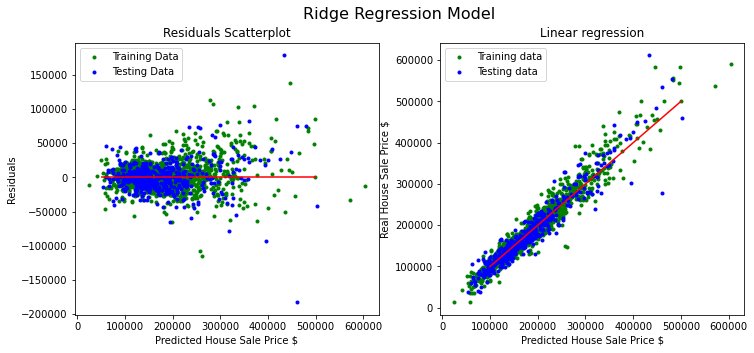

In [68]:
check_residual(ridge_cv, 'Ridge Regression', Xs_train_r, y_train_r, Xs_test_r, y_test_r)

Ridge - Coefficients

Number of coefficients in the Ridge model: 199


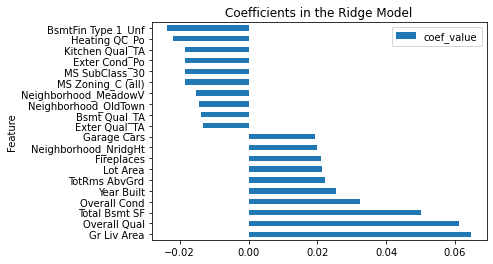

In [69]:
ridge_coefficients = pd.DataFrame({
                        'Feature': X_ridge.columns,
                        'coef_value': ridge_cv.coef_
                    }).set_index('Feature').sort_values('coef_value', ascending=False)

ridge_coeffs_nonzero = ridge_coefficients[ridge_coefficients['coef_value']!=0].shape[0]

print(f'Number of coefficients in the Ridge model: {ridge_coeffs_nonzero}')

ridge_coefficients_summary = pd.concat([ridge_coefficients.head(10),
                     ridge_coefficients.tail(10)])
ridge_coefficients_summary.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

### Lasso Regression 

In [70]:
X_lasso = df.drop(columns = ['SalePrice_log', 'SalePrice'])
y_lasso = df['SalePrice_log']

In [71]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_lasso, y_lasso, random_state=42)

# Scale data
ss = StandardScaler()
Xs_train_l = ss.fit_transform(X_train_l)
Xs_test_l = ss.transform(X_test_l)

In [72]:
l_alphas = np.logspace(-3, 0, 100)

lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

lasso_cv.fit(Xs_train_l, y_train_l);

In [73]:
lasso_cv.alpha_

0.005336699231206312

Lasso - Check how well does the model fit the data

In [74]:
print('Lasso - R^2 on training set:', lasso_cv.score(Xs_train_l, y_train_l))
print('Lasso - R^2 on test set:', lasso_cv.score(Xs_test_l, y_test_l))
print('Lasso - Cross validation R^2 score is:', cross_val_score(lasso_cv, X_train_l, y_train_l).mean())

Lasso - R^2 on training set: 0.9170712604063651
Lasso - R^2 on test set: 0.9106216768634122
Lasso - Cross validation R^2 score is: 0.894556039729413


In [75]:
evaluate_model(lasso_cv, Xs_test_l, y_test_l)

R2 Score: 0.9111474348049458
MSE: 575703610.5311733
RMSE: 23993.82442486344


Lasso - Check Residuals

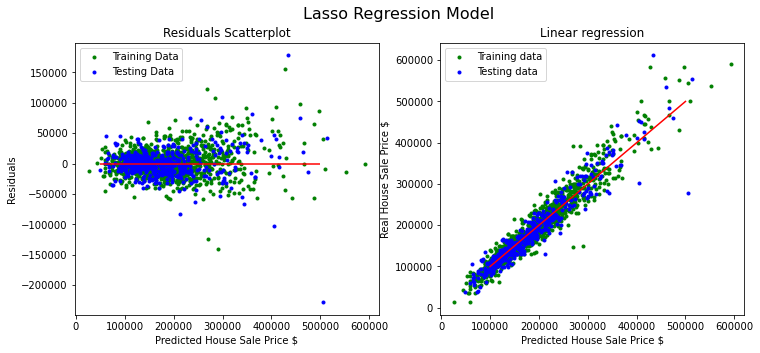

In [76]:
check_residual(lasso_cv, 'Lasso Regression', Xs_train_l, y_train_l, Xs_test_l, y_test_l)

Lasso - Coefficients

Number of coefficients in the Lasso model: 58


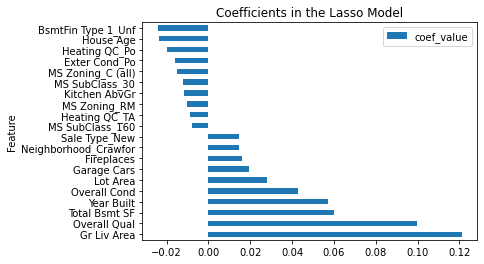

In [77]:
lasso_coefficients = pd.DataFrame({
                        'Feature': X_lasso.columns,
                        'coef_value': lasso_cv.coef_
                    }).set_index('Feature').sort_values('coef_value', ascending=False)

lasso_coeffs_nonzero = lasso_coefficients[lasso_coefficients['coef_value']!=0].shape[0]

print(f'Number of coefficients in the Lasso model: {lasso_coeffs_nonzero}')

lasso_coefficients_summary = pd.concat([lasso_coefficients.head(10),
                     lasso_coefficients.tail(10)])
lasso_coefficients_summary.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [78]:
np.exp(lasso_coefficients[lasso_coefficients.index == 'Gr Liv Area'])

,coef_value
Feature,
Gr Liv Area,1.128943


# Interpretation of Lasso Coefficient
For one standard deviation increase of square footage for Ground Living area,  we expect to see about a 13% increase in the sale price of the house (holding the rest of the features constant)

End of code



